In [157]:
import pandas as pd
import os.path
import os
import matplotlib.pyplot as plt
import numpy as np
import read_filepath_module

# 微波辐射计数据时段包含探空气球数据的时段,所以由探空气球代表的的世界时追踪微波辐射计代表的北京时
Year = '2009'
# os.mkdir(r'G:/python/Graduation design/photo/'+ Year)
# ↓探空气球数据
filepath_1 = r'I:\Data\Personal Data\graduation project\SACOL\Balloon'
Target_str_1 = 'UPAR'+Year
# ↓微波辐射计数据
filepath_2 = r'I:\Data\Personal Data\graduation project\SACOL\microwave'
Target_str_2 = 'lv2_'+Year

In [158]:
'''
    北京时 = 世界时 + 8
    此函数的功能就是将世界时转换为对应的北京时，
'''
def f_trans(str):
    if(str == '0000'):
        return('0800')
    elif(str == '1200'):
        return('2000')
    else:
        return('Error')

In [159]:
def draw_Linechart_photo(data,photoname):
    plt.clf()
    plt.rcParams['figure.figsize'] = (10.0,20.0)
    #纵轴上分布高度数值
    Height = data.columns.values[1:48]
    # 绘图
    Len = len(data['Time'])
    # print(data)
    i = 0
    while i<Len:
        data_for_print = np.array(data.iloc[i:i+1,1:48]).T
        plt.plot(data_for_print, Height, label=data['Time'][i:i+1].values)
        i = i+1
    #设置X轴
    x_ticks = np.linspace(180, 320, 8)
    plt.xticks(x_ticks,rotation=45)
    plt.xlabel("Fahrenheit K")
    plt.ylabel("Altitude km")
    # 启动图例
    plt.legend()
    # 添加网格
    plt.grid()
    # 主标题
    plt.title(photoname,fontsize=20,fontweight='bold')
    # 保存图片
    photopath = 'G:/python/Graduation design/photo/' + photoname + '.png'
    plt.savefig(photopath,bbox_inches = 'tight')
    # 展示图片
    # plt.show()

In [160]:
#函数 计算MSE
def calculate_MSE(ex_data):
    # print(ex_data.shape)
    # print(ex_data[0,0],ex_data[1,0])
    i = 1
    sum = 0
    # print('np.shape(ex_data)[1] is',np.shape(ex_data)[1])
    while i < np.shape(ex_data)[1]:
        sum = sum + (ex_data[0,i] - ex_data[1,i])**2
        i = i + 1
    MSE = sum/(np.shape(ex_data)[1] - 1)
    # print(MSE,'\n')
    return MSE

In [161]:
def file_to_photo(filepath,MSE_data,picture_dir_name):
    # data_1是气球探空数据
    data_1 = pd.read_csv(filepath)
    # draw_print是用于绘制折线图的DataFrame，空表
    draw_print = pd.DataFrame()
    i = 0
    while i < data_1.shape[0]:
        # 清空绘图数据表格
        draw_print.drop(draw_print.index, inplace=True)
        # print('i=',i)
        # 将气球探空数据加入绘图数据表格
        draw_print = draw_print.append(data_1.loc[i:i,])
        # print('气球',draw_print,'\n')
        # 由探空气球代表的的北京市得出对应的微波辐射计代表的世界时文件名称及路径
        file_search_point = 'lv2_' + str(data_1.loc[i:i,'Time'].values)[2:8]
        # print(str(data_1.loc[i:i,'Time'].values)[2:8])
        file_search_path = filepath_2 + '\\' + str(data_1.loc[i:i,'Time'].values)[2:6] +'\\' + file_search_point + '.csv'
        # print('file_search_path is',file_search_path)
        # 如果文件路径存在，执行搜索任务
        if(os.path.exists(file_search_path)):
            # 把小范围的微波辐射计数据加载到ready_data中
            ready_data = pd.read_csv(file_search_path)
            ready_data.rename(columns={'Date/Time':'Time'},inplace=True)
            # 确定具体的微博辐射计的时间点
            trans = f_trans(str(data_1.loc[i:i,'Time'].values)[14:18])
            trans_point = str(data_1.loc[i:i,'Time'].values)[2:10] + '_WT' + trans
            # 将时间对应的具体数据也加入到绘图数据表格内
            j = 0
            flag = 0
            while j < ready_data.shape[0]:
                # print(j)
                T = str(ready_data.loc[j:j,'Time'].values)[2:17]
                if(T == trans_point):
                    flag = j
                    draw_print = draw_print.append(ready_data.loc[j:j,])
                    # print('气球+微波',draw_print,'\n')
                    break
                j = j + 1
            #---------------------------------------------------------------------------------
            # flag!=0代表着找到了对应的数据
            if(flag != 0):
                # 重置index
                draw_print = draw_print.reset_index(drop=True)
                # print(draw_print)
                photoname = picture_dir_name + '\BeijingTime' + str(draw_print.loc[1:1,'Time'].values)[2:10] + '_' + str(draw_print.loc[1:1,'Time'].values)[13:17]
                # print(draw_print)
                # 绘图
                draw_Linechart_photo(draw_print,photoname)
                print('  Sir, I have drawn the '+photoname)
                MSE_data.loc[i,0] = photoname
                MSE = calculate_MSE(np.array(draw_print))
                MSE_data.loc[i,1] = MSE
                MSE_data.loc[i,2] = MSE**0.5
                print('  Sir, I have output MSE and RMSE\n')
                draw_print.drop(draw_print.index, inplace=True)
            else:
                print('  ' + trans_point+' data no exits')
        else:
            print('  ' + file_search_path+' file no exists')
                # print('finish\n')
                # print(draw_print)
                # print('\n\n\n')
                #MSE_data = MSE_data.append(photoname,calculate_MSE(np.array(draw_print)))
            # ---------------------------------------------------------------------
        i = i + 1       

In [162]:
os.chdir(r'G:\python\Graduation design\photo')
data_dir_name = Year+'_data'
picture_dir_name = Year+'_picture'
# 创建对比数据文件夹
if(os.path.exists(data_dir_name) == False):
    os.mkdir(os.getcwd()+'\\'+data_dir_name)
# 创建对比图片文件夹
if(os.path.exists(picture_dir_name)== False):
    os.mkdir(os.getcwd()+'\\'+picture_dir_name)

Start to process: I:\Data\Personal Data\graduation project\SACOL\Balloon\2009\UPAR200901.csv
  20090101_WT2000 data no exits
  20090102_WT0800 data no exits
  20090102_WT2000 data no exits
  20090103_WT0800 data no exits
  20090103_WT2000 data no exits
  20090104_WT0800 data no exits
  20090104_WT2000 data no exits
  20090105_WT0800 data no exits
  20090105_WT2000 data no exits
  20090106_WT0800 data no exits
  20090106_WT2000 data no exits
  20090107_WT0800 data no exits
  20090107_WT2000 data no exits
  20090108_WT0800 data no exits
  20090108_WT2000 data no exits
  20090109_WT0800 data no exits
  20090109_WT2000 data no exits
  20090110_WT0800 data no exits
  20090110_WT2000 data no exits
  20090111_WT0800 data no exits
  20090111_WT2000 data no exits
  20090112_WT0800 data no exits
  20090112_WT2000 data no exits
  20090113_WT0800 data no exits
  20090113_WT2000 data no exits
  20090114_WT0800 data no exits
  20090114_WT2000 data no exits
  20090115_WT0800 data no exits
  20090115_

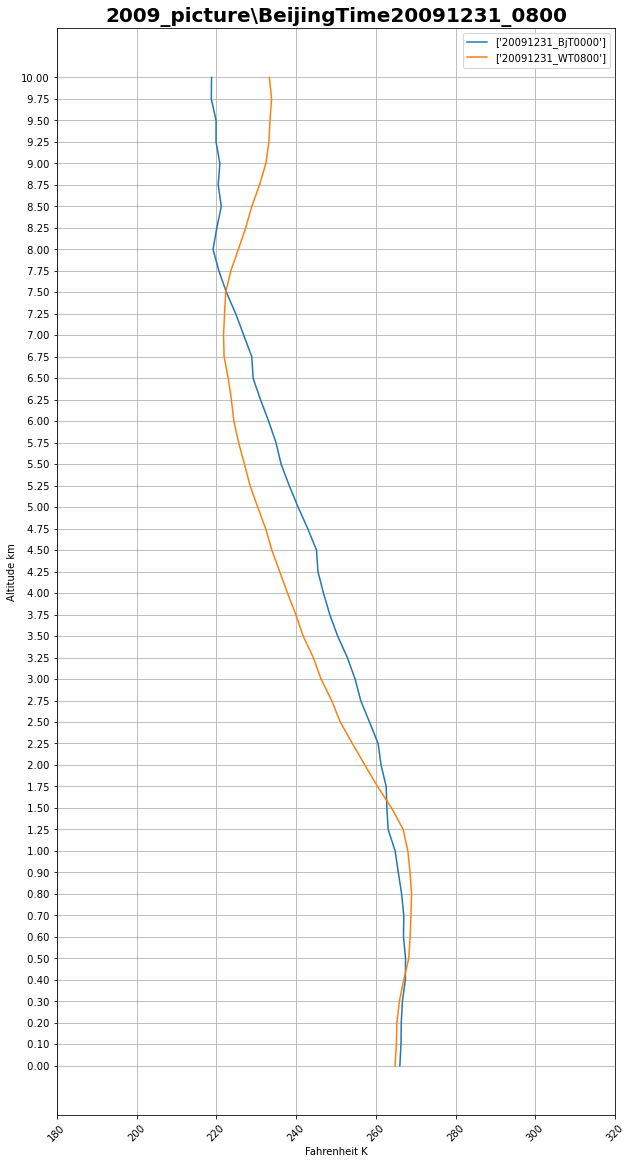

In [163]:
L1_filepaths = read_filepath_module.read_filepath(filepath_1,Target_str_1)
L2_filepaths = read_filepath_module.read_filepath(filepath_2,Target_str_2)
for L1_filepath in L1_filepaths:
    MSE_data = pd.DataFrame()
    print('Start to process: ' + L1_filepath)
    file_to_photo(L1_filepath,MSE_data,picture_dir_name)
    MSE_data.rename(columns={0:'Time',1:'MSE',2:'RMSE'},inplace=True)
    MSE_data = MSE_data.round(2)
    MSE_data.to_csv(r'G:/python/Graduation design/photo/' + data_dir_name + '/' + L1_filepath[64:74],index=0)
    print('  Sir, I have output the file named:' + data_dir_name + '/' + L1_filepath[64:74] + '\n\n')